In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# TP1

*Ejercicio 1* : Realice y grafique una imagen con una cruz negra y fondo blanco.


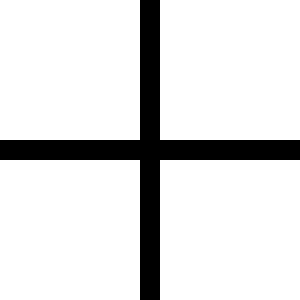

In [0]:
size = 300
img = np.ones((size,size), np.uint8) * 255

middle = int(size/2)
width = 10

img[middle-width:middle+width, :] = 0
img[:, middle-width:middle+width] = 0

cv2_imshow(img)

*Ejercicio 2* : Realice y grafique una imagen con una cruz blanca y fondo negro (negativo de la primera).


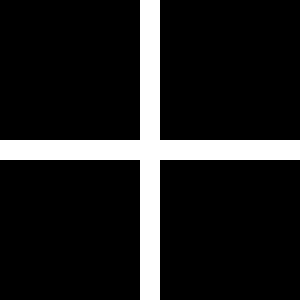

In [0]:
inverted_img = ~img
# inverted_img = cv2.bitwise_not(img)
cv2_imshow(inverted_img)

*Ejercicio 3*: Realice y grafique, una imagen con cuatro bandas horizontales de intensidad homogénea decreciente de 1 a 0 de arriba abajo.


150


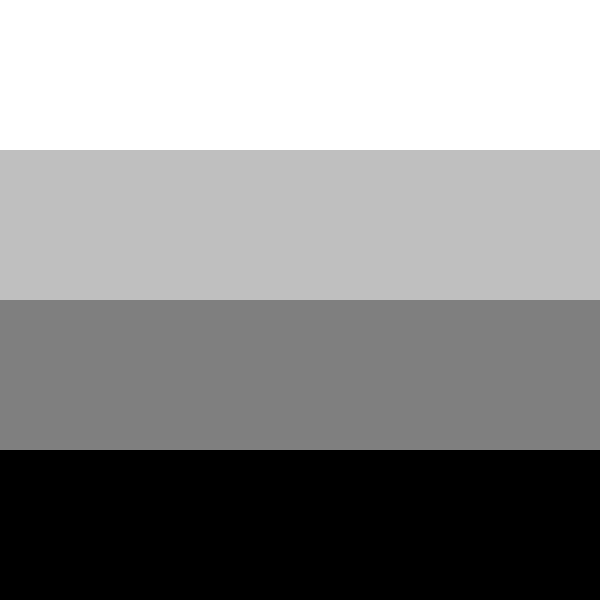

In [0]:
size = 600
quarter = int(size/4)
print(quarter)
img = np.zeros((size,size))
img[:quarter, :] = 1
img[quarter: 2*quarter, :] = 3/4
img[2*quarter:3*quarter, :] = 1/2
img[3*quarter:, :] = 0
img = img *255
cv2_imshow(img)

*Ejercicio 4*: Construir y graficar una imagen 128x128 dividida en cuatro 

*   Elemento de la lista
*   Elemento de la lista

cuadrados de colores: rojo, azul, amarillo y uno a elección.


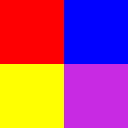

In [0]:
img = np.ones((128,128,3))

img[:64,:64,2] = 255
img[:64,64:,0] = 255
img[64:,:64,1:] = 255
img[64:,64:,:] = [227,43,199]

cv2_imshow(img)

*Ejercicio 5*: Abrir una imagen guardada en un archivo, convertirla en Imagen monocroma, y graficar ambas imágenes a la par, colocarle título a ambas.


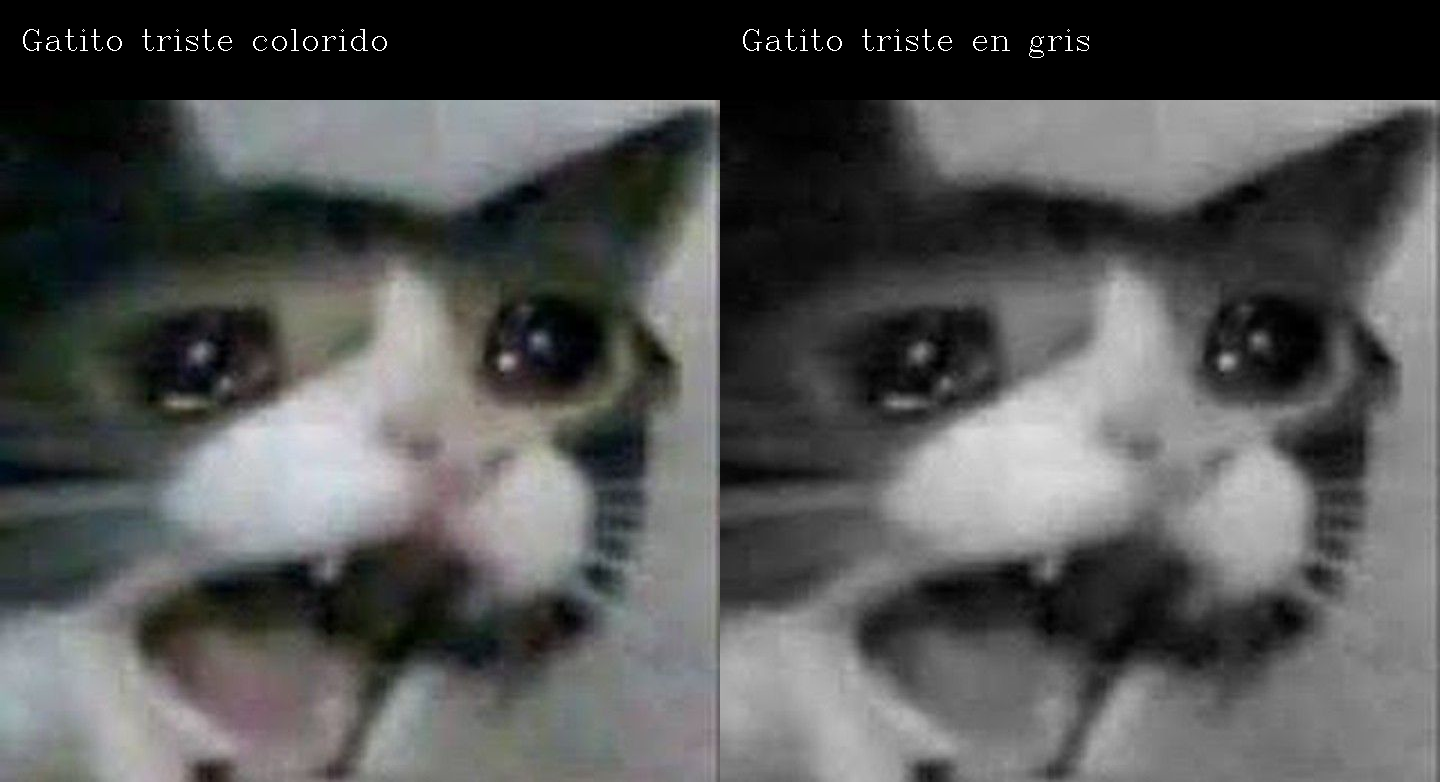

In [0]:
img_color = cv2.imread('gatito.jpg')
img_monocrome = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

img = np.zeros((100+682,720*2,3))
img[100:, :720, :] = img_color
img[100:, 720:, 0] = img_monocrome
img[100:, 720:, 1] = img_monocrome
img[100:, 720:, 2] = img_monocrome

cv2.putText(img, "Gatito triste colorido", (20,50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 1)
cv2.putText(img, "Gatito triste en gris", (720+20,50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,255), 1)


cv2_imshow(img)

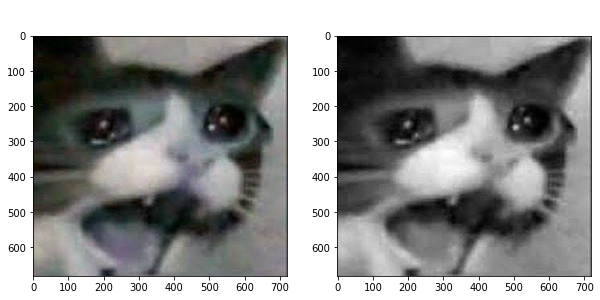

In [0]:
fig = plt.figure(figsize=(10, 10))

columns = 2
rows = 1

fig.add_subplot(rows, columns, 1)
plt.imshow(img_color)
plt.title("Gatito triste colorido", fontdict={'color': 'white'})

fig.add_subplot(rows, columns, 2)
plt.imshow(img_monocrome, cmap='gray')
plt.title("Gatito triste gris", fontdict={'color': 'white', 'size': 30})

plt.show()

*Ejercicio 6*: Construir y graficar una imagen a color que mezcle una imagen con paisaje a la que se le superponga una persona de otra imagen.


In [0]:
import cv2
from google.colab.patches import cv2_imshow 
paisaje= cv2.imread('paisaje.jpg') 
persona = cv2.imread('persona.jpg')

scale_percent = 40 # percent of original size
width = int(persona.shape[1] * scale_percent / 100)
height = int(persona.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(persona, dim)
print(resized.shape)
print (paisaje.shape)


(246, 114, 3)
(300, 450, 3)


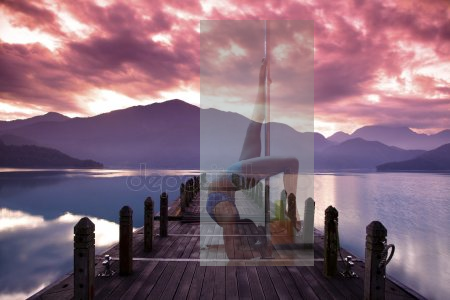

In [0]:
rows,cols,channels = resized.shape
filainicio = 20
columnainicio = 200
mezcla = cv2.addWeighted(paisaje[filainicio:filainicio+rows, columnainicio:columnainicio+cols],0.5,resized,0.5,0)
paisaje[filainicio:filainicio+rows, columnainicio:columnainicio+cols] = mezcla

cv2_imshow (paisaje)

*Ejercicio 7*: Cargar una imagen monocroma y realizar por separado las siguientes modificaciones : Aclararla, Oscurecerla y Obtener el negativo.


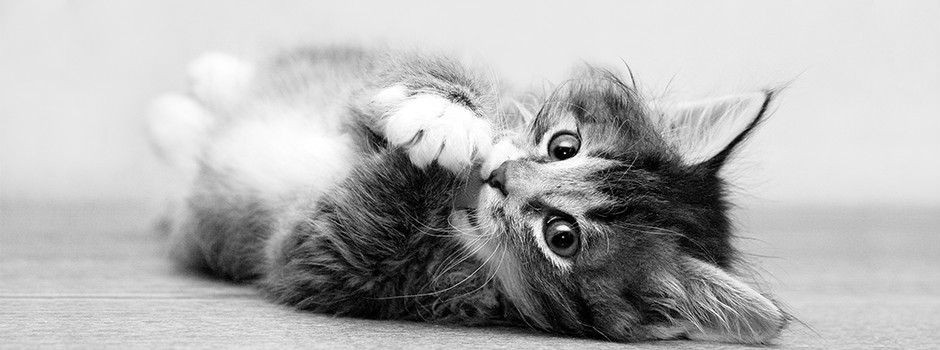

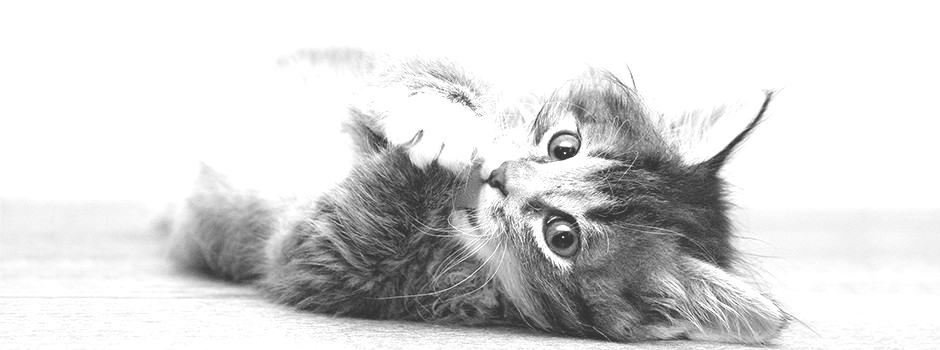

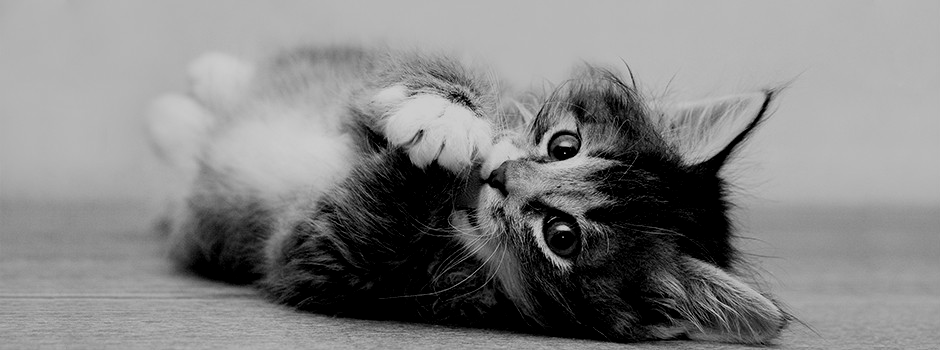

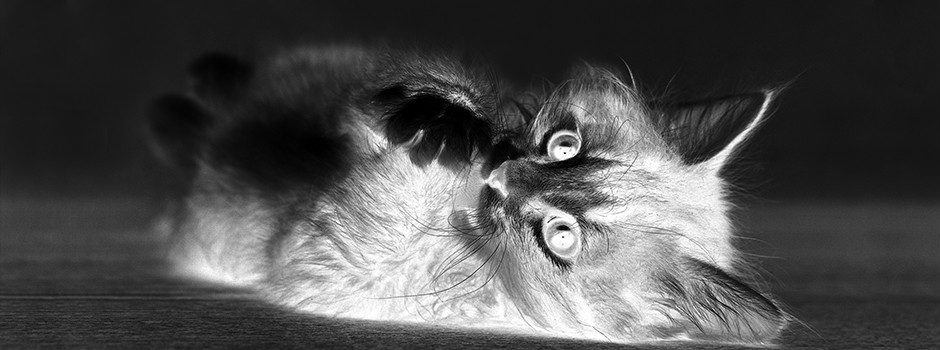

In [0]:
img = cv2.imread('gatite.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
claro= cv2.add(img,np.array([50.0]))
cv2_imshow(claro)
oscuro= cv2.add(img,np.array([-50.0]))
cv2_imshow(oscuro)
negativo = ~img
cv2_imshow(negativo)

*Ejercicio 8*: Obtener el valor de gris más repetido en cada imagen.


In [0]:
unique, counts = np.unique(img, return_counts=True)
indice_max = np.argmax(counts)
gris_max = unique[indice_max]
print(f'Gris mas repetido en imagen original: {gris_max}')

unique, counts = np.unique(claro, return_counts=True)
indice_max = np.argmax(counts)
gris_max = unique[indice_max]
print(f'Gris mas repetido en imagen aclarada: {gris_max}')

unique, counts = np.unique(oscuro, return_counts=True)
indice_max = np.argmax(counts)
gris_max = unique[indice_max]
print(f'Gris mas repetido en imagen oscurecida: {gris_max}')

unique, counts = np.unique(negativo, return_counts=True)
indice_max = np.argmax(counts)
gris_max = unique[indice_max]
print(f'Gris mas repetido en imagen en negativo: {gris_max}')

Gris mas repetido en imagen original: 233
Gris mas repetido en imagen aclarada: 255
Gris mas repetido en imagen oscurecida: 0
Gris mas repetido en imagen en negativo: 22


*Ejercicio 9*: Aplicar una máscara de suavizado de 5x5 a la componente roja de una imagen a elección, un filtro de bordes a la componente verde componer una imagen a color donde se reemplace las componentes rojas y verdes modificadas.


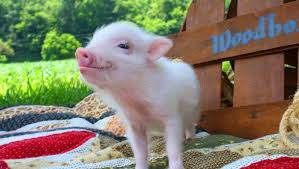

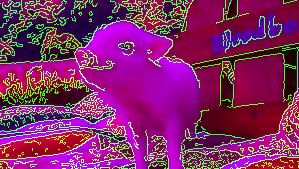

In [0]:
cerdito = cv2.imread('cerdito.jpeg')
caparoja = cv2.blur(cerdito[:,:,2], (5,5))
capaverde = cerdito[:,:,1]
capaverde = cv2.Canny(capaverde, 100, 200)
cerditomodificado = cerdito.copy()
cerditomodificado[:,:,1] = capaverde
cerditomodificado[:,:,2] = caparoja
cv2_imshow(cerdito)
cv2_imshow(cerditomodificado)

*Ejercicio 10* : Binarice una imagen a elección buscando demarcar uno o varios objetos en esta (puede ser eligiendo un umbral a partir del histograma de una imagen monocroma). Al resultado aplicarle 2 o 3 filtros morfológicos en el orden que crea adecuado para mejorar la segmentación con elemento estructurante creado por usted, según crea adecuado para el problema (justifique).


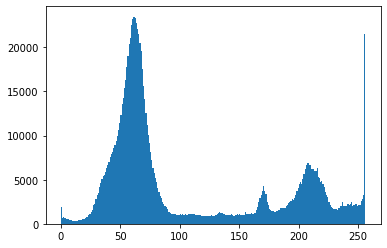

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
mesagris = cv2.imread('mesa.jpg',cv2.IMREAD_GRAYSCALE)
plt.hist(mesagris.ravel(),256,[0,256]); plt.show()

In [0]:
th = 95
binarizada = mesagris > th
binarizada = (mesagris > th) * 255

In [0]:
kernel = np.ones((7,7), np.uint8)
binarizada = np.uint8(binarizada)

filtrada = cv2.erode(binarizada,kernel,iterations = 1)
mejorada = cv2.morphologyEx(binarizada, cv2.MORPH_OPEN, kernel)

*Ejercicio 11*: Mostrar en una misma ventana, la imagen original, la binaria y la resultante de aplicarle los filtros. Comente si tuvo buenos resultados.


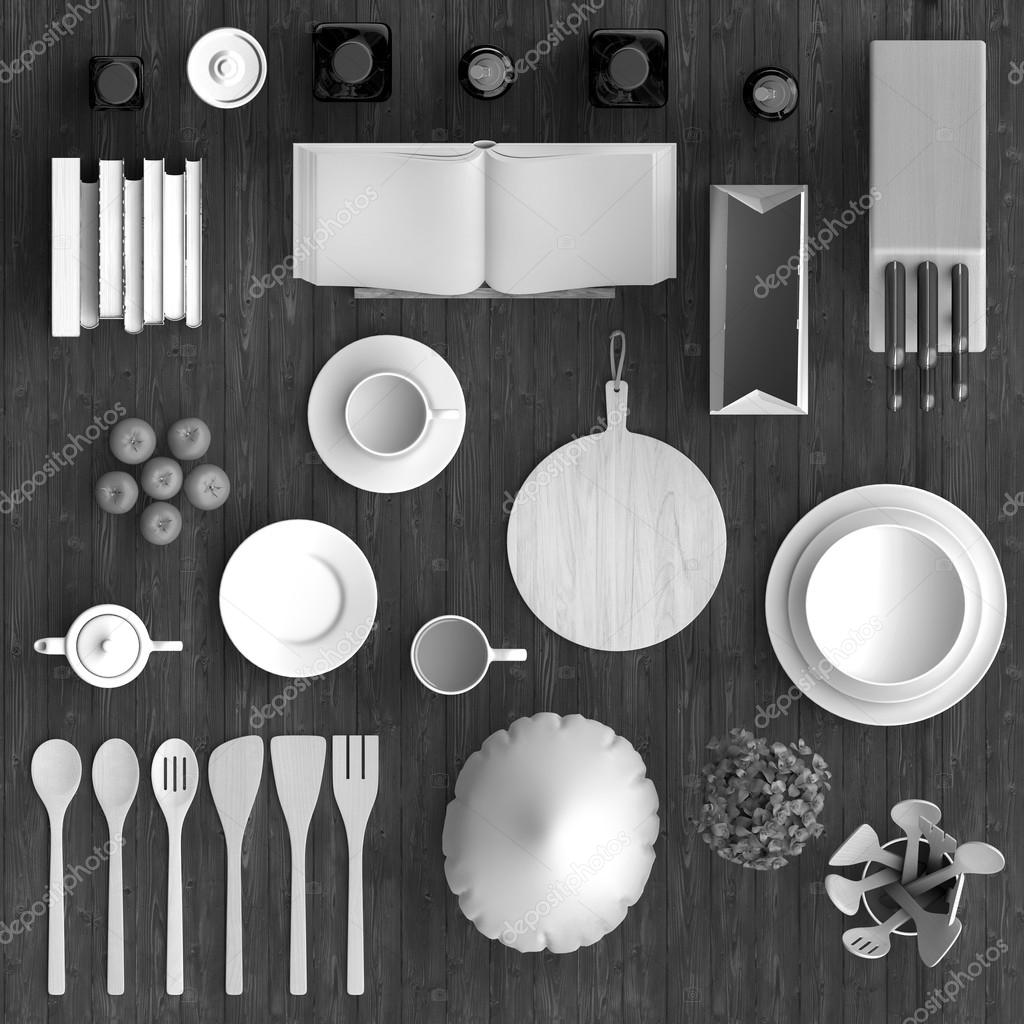

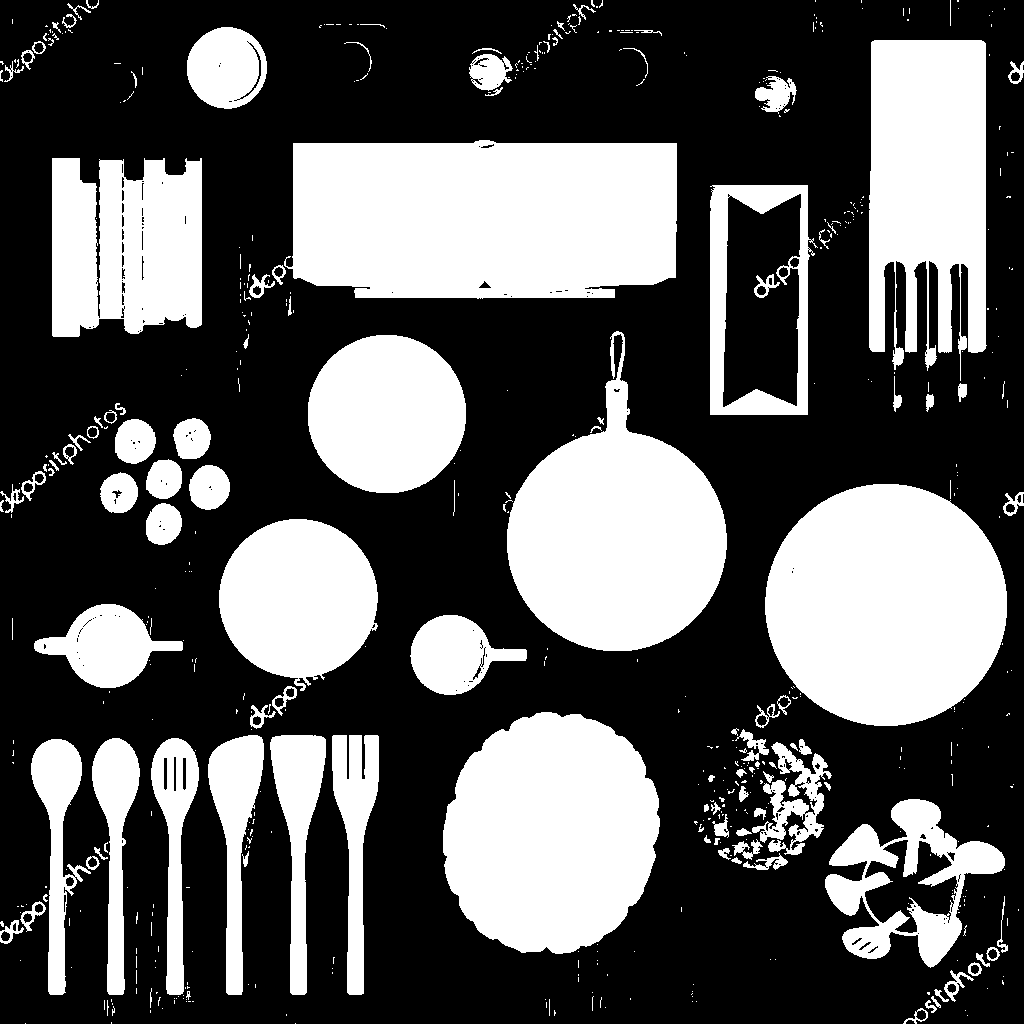

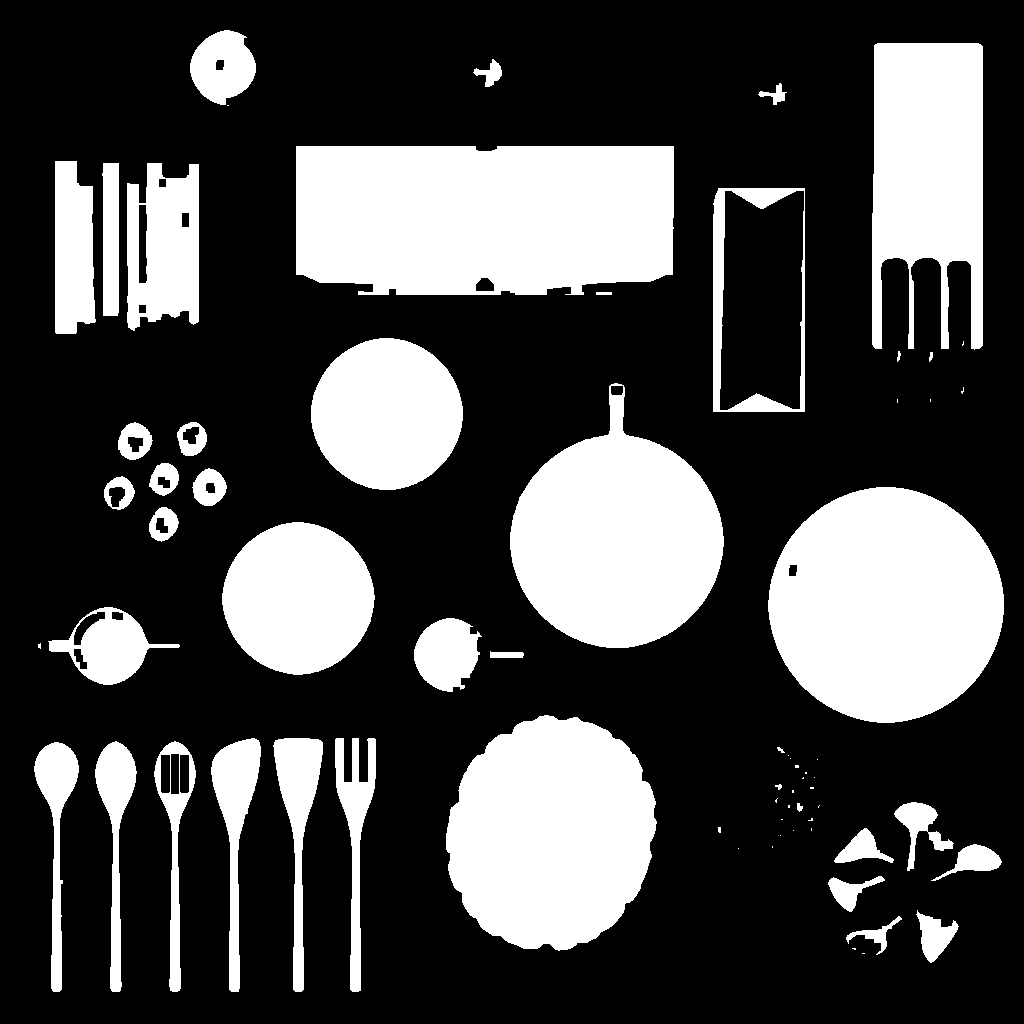

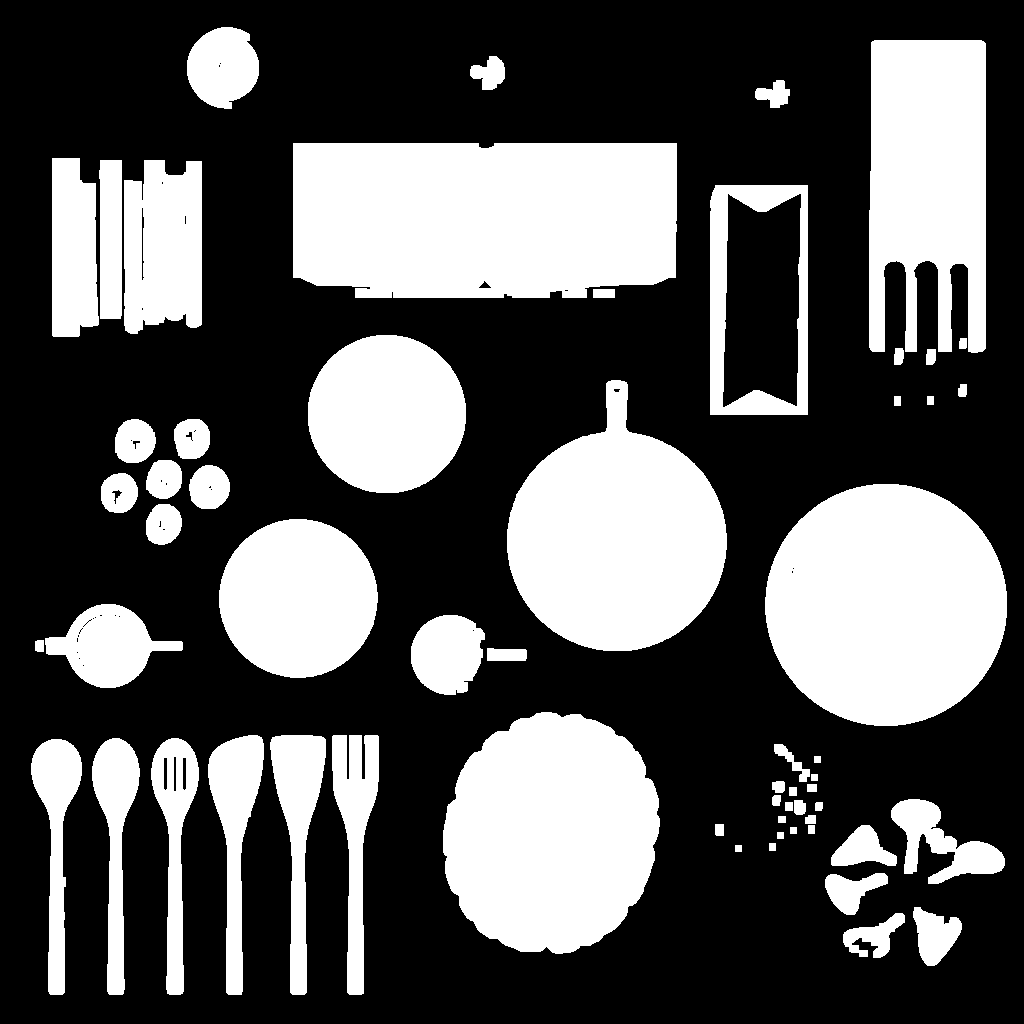

In [0]:
cv2_imshow(mesacolor)
cv2_imshow(binarizada)
cv2_imshow(filtrada)
cv2_imshow(mejorada)

Obtuve buenos resultados: se limpiaron las etiquetas y algunos puntos blancos. 

*Ejercicio 12*: Encuentre bordes o el contorno del objeto u objetos en la imagen binaria utilizando operaciones morfológicas.


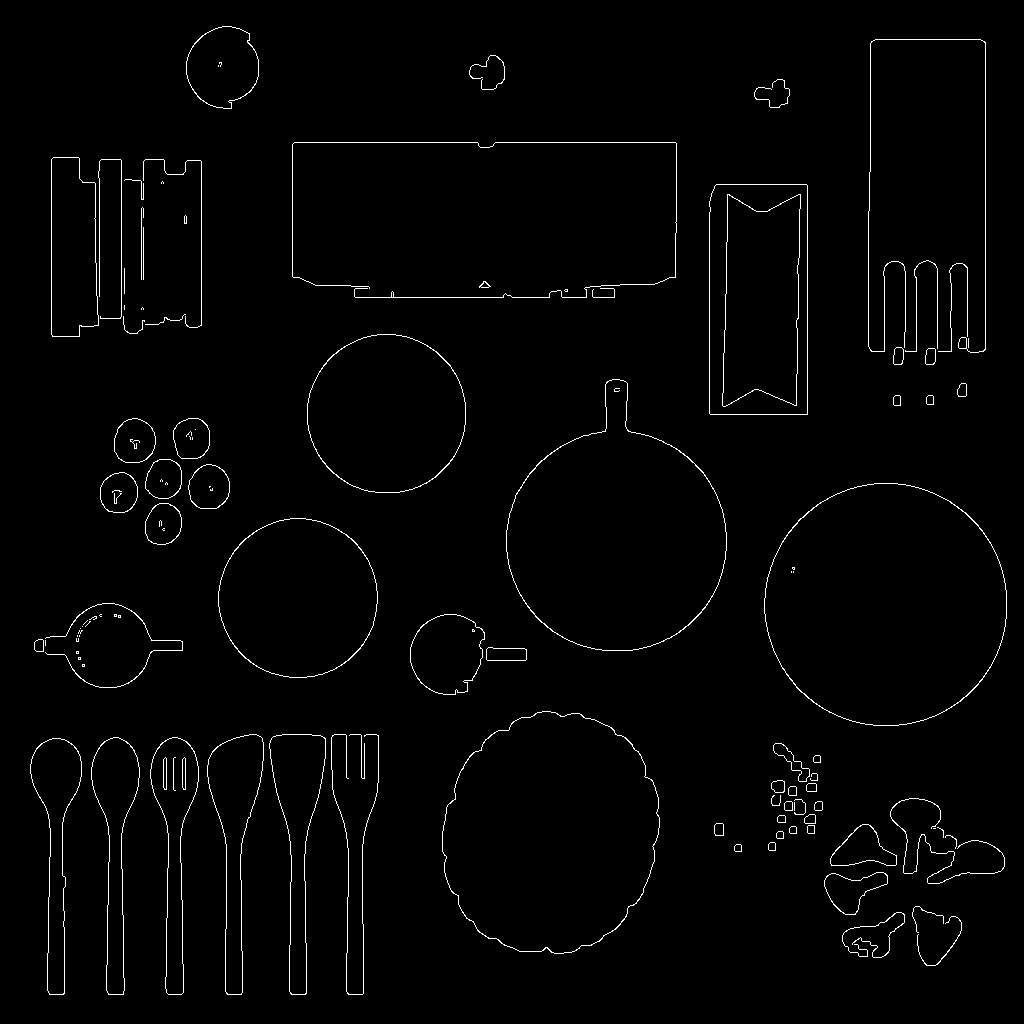

In [0]:
bordes = cv2.Canny(mejorada, 1, 100)
cv2_imshow(bordes)


*Ejercicio 13*: Cargar una imagen a color (a elección), que a su criterio tenga entre 2 y 7 clases en ella.


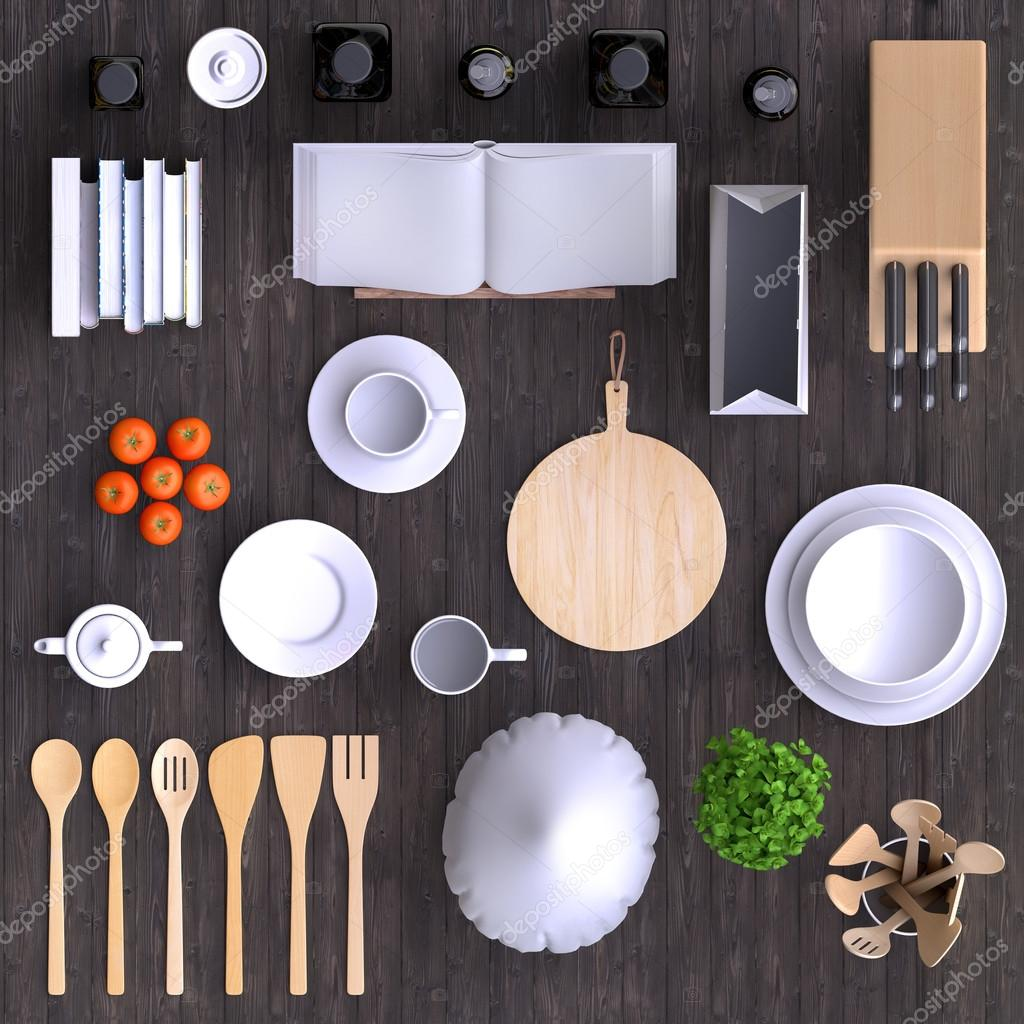

In [0]:
mesa = cv2.imread('mesa.jpg')
cv2_imshow(mesa)           

a) Explique coloquialmente la cantidad y el criterio visual que utilizó para identificarlas.

b) Agregue una o dos características (capas, bandas, etc, pueden ser bordes de alguna componente) más a la imagen que considere puedan ser relevantes para la clasificación.

In [0]:
mesa.shape #las caracteristicas se agregan abajo

(1024, 1024, 3)

c) Construya una muestra de entrenamiento de la imagen utilizando todas las características.

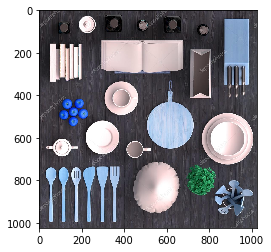

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
mesa = cv2.imread('mesa.jpg')
plt.imshow(mesa)
plt.show()  

In [0]:
roi1=(170, 220, 400, 200) 
roi2=(500, 670, 200, 200)
roi3=(750, 20, 80, 300)
rois=[roi1,roi2,roi3]

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
mesa = cv2.imread('mesa.jpg')
bordes = cv2.Sobel(mesa,cv2.CV_64F,1,1,ksize=5)

mesa2=np.zeros((bordes.shape[0],bordes.shape[1],6))
mesa2[:,:,0:3]=mesa
mesa2[:,:,3:6]=bordes 
print(mesa2.shape)

(1024, 1024, 6)


In [0]:
import numpy as np
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,6])
target=np.zeros(cantidad)
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            data[cuenta,:]=mesa2[fil,col,:]
            target[cuenta]=i
            cuenta=cuenta+1
    
print(cuenta)    
import pandas as pd
df = pd.DataFrame(data, columns=["azul","verde","rojo","bordes_azul","bordes_verde","bordes_rojo"])
print(df.shape)
print('target=',target, '; dimensión target=',target.shape)
df.head(10)

144000
144000
(144000, 6)
target= [0. 0. 0. ... 2. 2. 2.] ; dimensión target= (144000,)


azul  verde   rojo  bordes_azul  bordes_verde  bordes_rojo
0  253.0  255.0  255.0          0.0           0.0          0.0
1  252.0  254.0  254.0          0.0           0.0          0.0
2  255.0  254.0  254.0          0.0           0.0          0.0
3  255.0  255.0  255.0          0.0           1.0          0.0
4  255.0  254.0  255.0         -6.0           2.0          6.0
5  255.0  255.0  255.0        -12.0           1.0         12.0
6  254.0  251.0  253.0          0.0          -3.0          3.0
7  255.0  253.0  254.0         12.0          -7.0         -6.0
8  255.0  244.0  240.0          8.0           1.0        -13.0
9  250.0  232.0  225.0         12.0          12.0        -25.0

d) Realice un análisis exploratorio con gráficos de la muestra de entrenamiento discriminando con diferente color cada clase.

cantidad de observaciones: 144000
cantidad de clases: 3
cantidad de variables/dimension: 6
se grafican de a dos (dimensión 2)


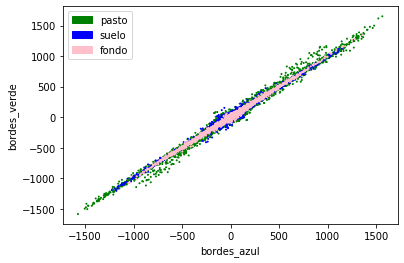

In [0]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colores=['green','blue','pink']
variables=["azul","verde","rojo","bordes_azul","bordes_verde","bordes_rojo"]

variable1=variables[3]
variable2=variables[4]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',6)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='pasto')
patch2 = mpatches.Patch(color=colores[1], label='suelo')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

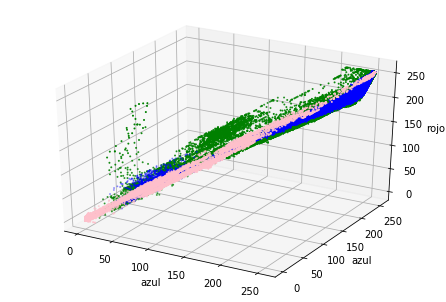

In [0]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

j=0  
l=1
m=2

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[j]].values, df[variables[l]].values, df[variables[m]].values,c=asignar, s=1)
ax.set_xlabel(variables[j])
ax.set_ylabel(variables[j])
ax.set_zlabel(variables[m])
plt.show()

e) Clasifíquela utilizando la muestra de entrenamiento y K-NN (k vecinos más cercanos). O con el método que guste.


In [0]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data, target)
print('Presición del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data, target)))
print('Específicamente el {:.2f}'
     .format(100*knn.score(data, target)),'% de los datos de entrenamiento fueron clasificados correctamente')

Presición del clasificador K-NN en el conjunto de entrenamiento: 0.80
Específicamente el 79.98 % de los datos de entrenamiento fueron clasificados correctamente


In [0]:
a=mesa.shape
print(a)
clasif=np.zeros(a[0:2])
print(knn.predict([[40, 80, 40, 0,0, 255]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([mesa2[i,j,:]])
        
print('No se puede evaluar el porcentaje de acierto o Presición en el resto de la imagen')
print('Realizaremos una valoración visual')    #Demora muchisimo

(1024, 1024, 3)
[0.]
No se puede evaluar el porcentaje de acierto o Presición en el resto de la imagen
Realizaremos una valoración visual


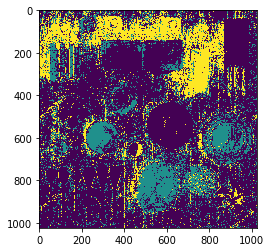

In [0]:
plt.imshow(clasif)
plt.show()

f) Generar una máscara o elemento estructural, y realice con éste una mejora de la clasificación obtenida en el ejercicio anterior utilizando un filtro de moda. Mirando el resultado final decida si considera que la clasificación fue buena y si la cantidad de clases elegida fue la adecuada.

In [0]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]

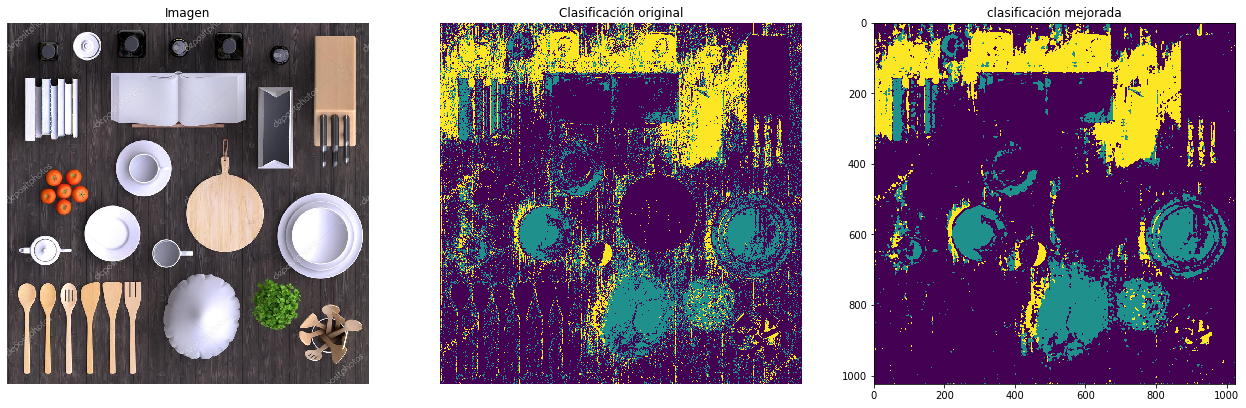

In [0]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(22)
axs[0].imshow(mesa[:,:,[2,1,0]])
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

Comentario: no salio lo esperado, no se notan mejoras con el filtro moda. En la imagen original se pueden apreciar las clases definidas pero no muy bien. 